In [11]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



2.17.0


In [12]:
import os

base_dir = '/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [13]:
os.listdir('/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/train')

['paper', 'rock', 'scissors']

In [14]:
os.listdir('/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val')

['paper', 'rock', 'scissors']

In [15]:
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    validation_split=0.4  # 40% untuk validation
    )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical', # menggunakan categorical karena klasifikasi lebih dari 2 kelas
    subset='training'  # Training data
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation data
)

Found 1314 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [16]:
# # lihat hasil augmentasi
# x_batch, y_batch = train_generator.__next__()
# plt.title("train_generator")
# for i in range(len(x_batch)):
#     plt.subplot(330+1+i)
#     plt.imshow(x_batch[i])
#     plt.axis('off')
# plt.show()

# # lihat hasil augmentasi
# x_batch, y_batch = validation_generator.__next__()
# plt.title("validation_generator")
# for i in range(len(x_batch)):
#     plt.subplot(330+1+i)
#     plt.imshow(x_batch[i])
#     plt.axis('off')
# plt.show()

In [17]:
# Proses CNN
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727871020.069068  110155 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727871020.124816  110155 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727871020.124872  110155 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727871020.125914  110155 cuda_executor.cc:1001] 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Menggunakan dropout
# model.add(tf.keras.layers.Dropout(0.2))

# Menggunakan early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727871025.871764  111107 service.cc:146] XLA service 0x7f2a240063d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727871025.871818  111107 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-02 19:10:25.914767: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-02 19:10:26.149358: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/41 ━━━━━━━━━━━━━━━━━━━━ 5:59 9s/step - accuracy: 0.5625 - loss: 1.0770

I0000 00:00:1727871031.655700  111107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.3936 - loss: 1.4251 - val_accuracy: 0.4167 - val_loss: 1.0561
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.1152 - val_accuracy: 0.5000 - val_loss: 1.1217
Epoch 3/50


2024-10-02 19:10:44.399693: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-02 19:10:44.399780: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.4752 - loss: 1.0351 - val_accuracy: 0.5833 - val_loss: 1.0455
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6562 - loss: 0.8625 - val_accuracy: 0.6667 - val_loss: 0.9618
Epoch 5/50


2024-10-02 19:10:54.028030: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-02 19:10:54.028110: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:10:54.028158: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.6094 - loss: 0.8746 - val_accuracy: 0.8333 - val_loss: 0.8007
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5938 - loss: 0.9103 - val_accuracy: 0.5000 - val_loss: 0.8767
Epoch 7/50


2024-10-02 19:11:03.806336: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:03.806461: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.7540 - loss: 0.6966 - val_accuracy: 0.9167 - val_loss: 0.3487
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.5016 - val_accuracy: 0.7500 - val_loss: 0.7028
Epoch 9/50


2024-10-02 19:11:12.637853: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-02 19:11:12.637918: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:12.637965: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.8386 - loss: 0.4100 - val_accuracy: 0.7500 - val_loss: 0.4466
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.4049 - val_accuracy: 1.0000 - val_loss: 0.2014
Epoch 11/50


2024-10-02 19:11:21.672027: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:21.672097: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.9112 - loss: 0.2769 - val_accuracy: 0.8333 - val_loss: 0.2951
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.2605 - val_accuracy: 0.9167 - val_loss: 0.3026
Epoch 13/50


2024-10-02 19:11:30.944364: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:30.944446: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.9594 - loss: 0.1479 - val_accuracy: 0.9167 - val_loss: 0.1831
Epoch 14/50
 1/41 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.3597

2024-10-02 19:11:40.036559: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:40.036657: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8750 - loss: 0.3597 - val_accuracy: 1.0000 - val_loss: 0.1016
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9243 - loss: 0.2082 - val_accuracy: 0.9167 - val_loss: 0.1131
Epoch 16/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2202 - val_accuracy: 0.8333 - val_loss: 0.5375
Epoch 17/50


2024-10-02 19:11:49.267480: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-10-02 19:11:49.267546: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:49.267588: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9106 - loss: 0.2488 - val_accuracy: 0.9167 - val_loss: 0.3539
Epoch 18/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.5227 - val_accuracy: 0.8333 - val_loss: 0.3536
Epoch 19/50


2024-10-02 19:11:58.254479: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9301270044420217524
2024-10-02 19:11:58.254557: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2385347177312624570


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9090 - loss: 0.2958 - val_accuracy: 0.8333 - val_loss: 0.4770


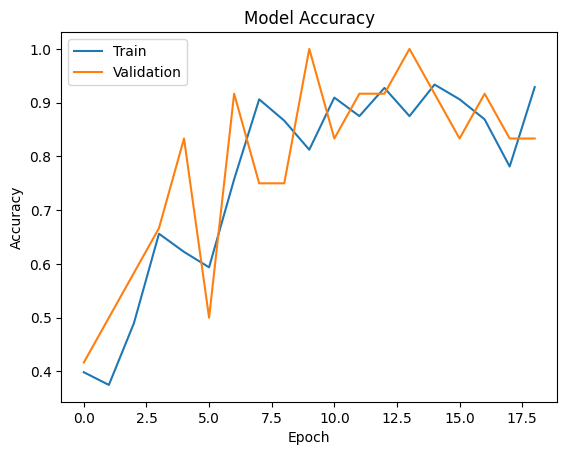

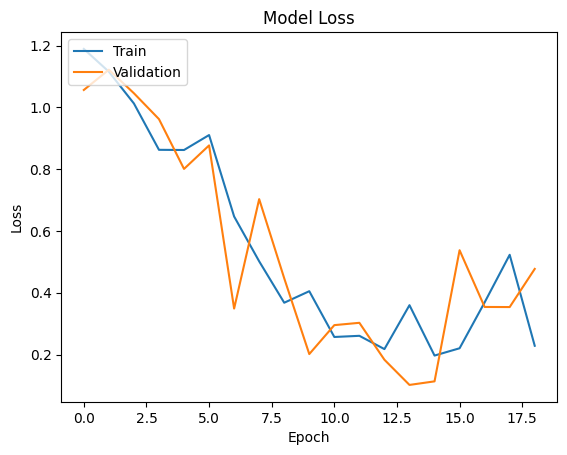

In [19]:
# Menetapkan batas waktu pelatihan
import time

start_time = time.time()

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Jumlah epoch (iterasi) pelatihan
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: (
            model.stop_training if (time.time() - start_time) > 1800 else None))  # 30 menit = 1800 detik
    ]
)

# Load history
history = model.history

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot los pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
model.save('model_gunting_batu_kertas_fix.h5')

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load model yang sudah dilatih
model_latih = model
# model_latih = tf.keras.models.load_model('/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/model_gunting_batu_kertas_fix.h5')  # Ganti dengan nama file model Anda
class_names = ['paper','rock', 'scissors']  # Ganti dengan nama kelas sebenarnya

# Fungsi untuk melakukan prediksi
def predict_image(img_path):
  # Load gambar dan ubah ukurannya sesuai dengan input model
  img = image.load_img(img_path, target_size=(150, 150))
  # Ubah gambar menjadi array NumPy
  img_array  = image.img_to_array(img)
  # Tambahkan dimensi untuk batch
  img_array  = np.expand_dims(img_array , axis=0)
  # Normalisasi gambar (opsional, tergantung preprocessing saat pelatihan)
  img_array  /= 255.0
  
  # Melakukan prediksi
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions[0])  # Mengambil kelas dengan probabilitas tertinggi
  confidence = predictions[0][predicted_class]  # Mengambil confidence dari prediksi
  
  # Get class names (assuming you have a list of class names)
  # class_names_rusak = ['rock', 'paper', 'scissors']
  class_names = ['paper', 'rock', 'scissors']
  
  # Menampilkan hasil prediksi
  print(f'Prediksi: {class_names[predicted_class]} dengan keyakinan {confidence:.2f}')
  # Menampilkan gambar
  img = image.load_img(img_path, target_size=(150, 150))
  plt.imshow(img)
  plt.title(f'Prediksi: {class_names[predicted_class]}')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediksi: rock dengan keyakinan 0.92


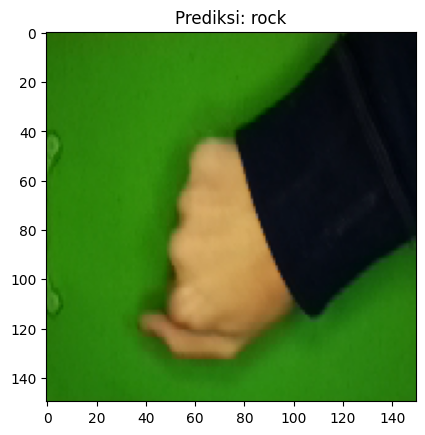

In [52]:
# Contoh penggunaan
# 0 rock: /home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/rock/Aa9hY8wo2ixaUNKH.png
img_path1 = '/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/rock/Aa9hY8wo2ixaUNKH.png'
predict_image(img_path1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediksi: paper dengan keyakinan 0.86


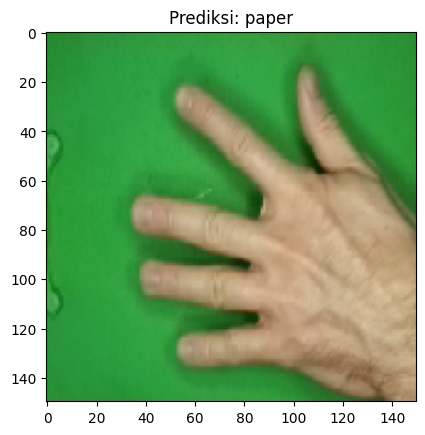

In [53]:
# 1 paper: /home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/paper/1fKclJk4eBWOQSR1.png
img_path2 = '/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/paper/2PAcPusQ59xIMfiw.png'
predict_image(img_path2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediksi: scissors dengan keyakinan 0.99


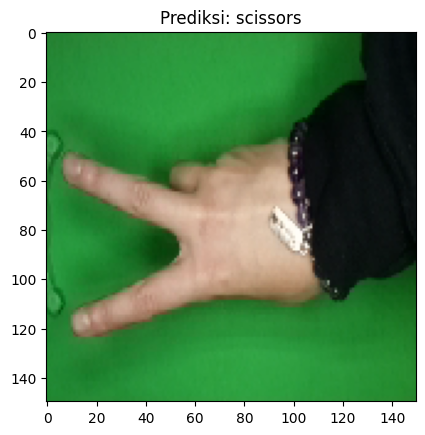

In [54]:
# 2 scissors: /home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/scissors/0Ug54ifXRqqlZS2Z.png
img_path3 = '/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/dataset/resource/val/scissors/3bkC6JAPog7xX9WO.png'
predict_image(img_path3)


# Identitas Diri
 - Nama: Widi Arrohman
 - Username: widi_arrohman